# Ejercicio 5
## Reyes Romero Alejandro
### Instrucciones:
Aproximar la solución a la ecuación de onda con los siguientes parámetros:
1. Longitud del dominio L= 1.
2. Número de incógnitas N= 20.
3. Tiempo máximo de simulación Tmax= 1.
4. Paso de tiempo 0.05.
5. Parámetro α igual a 2.
6. Condiciones de frontera tipo Dirichlet igual a cero.
7. Condición inicial: $u(x,0) =f(x) = sin(πx)$.
8. Velocidad inicial: $g(x) = 0$

Este ejemplo tiene solución analítica igual a: $u(x,t) = sin(πx) cos(2πt)$

In [1]:
#Importamos los módulos a usar:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#Funciones a utilizar:
def f(x):
    """
    """
    return  np.sin(np.pi * x)
def g(x):
    """
    """
    return 0
def  solExacta(x, t):
    """
    """
    return  np.sin(np.pi * x) * np.cos(2 * np.pi * t)
def  calcError(sol_n , sol_e):
    """
    """
    return  np.abs(sol_n -sol_e)
def  condicionesIniciales(l, ht , u, x, op=1):
    """
    """
    N = len(u)
    w = np.zeros(N)
    for i in  range(1,N-1):
        if op == 1:
            w[i] = u[i] + ht * g(x[i])
        else:
            w[i] = (1 - l**2) * u[i] + 0.5 * l**2 * (u[i+1] + u[i-1]) + ht * g(x[i])
    return w
def  solver(u, w, N, x, Nt, l,xs):
    """
    """
    s = np.zeros(N+2)
    for n in  range(1,Nt):
        for i in  range(1,N+1):
            s[i] = 2 * (1 - l**2) * w[i] + l**2 * (w[i+1] + w[i-1]) - u[i]
        u = w.copy()
        w = s.copy()
        print (u)
        print(w)
        plt.plot(x,s,'ko-')
    return s

In [11]:
#Código
L = 1           # Longitud  del  dominio
N = 9          # Numero  de  incognitas  internas
Tmax = 1.0     # Tiempo  maximo  de  simulacion
ht = 0.05      # Paso de  tiempo
alpha = 2      # Dato  fisico
h = L / (N+2) # Tamanio  de la malla  espacial
Nt = int(Tmax / ht)     # Numero  total  de  pasos
lamb = alpha * ht / h   # Parametro  lambda
Tmax = Nt * ht           # Tiempo  total  de  simulacion


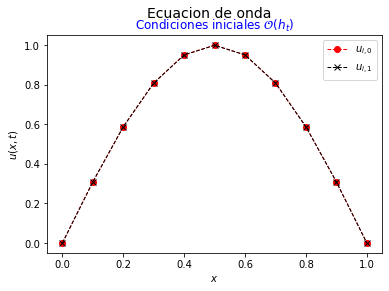

In [12]:
x = np.linspace(0,L,N+2)   # Coordenadas  de la  malla

u = f(x)                      # Condicion  inicial
w = condicionesIniciales(lamb , ht, u, x, op=1) # Euler :op = 1
plt.suptitle('Ecuacion de onda', fontsize =14)
plt.plot(x, u,'ro--', lw = 1, label = "$u_{i,0}$")
plt.plot(x, w,'kx--', lw = 1, label = "$u_{i,1}$")
plt.title('Condiciones iniciales $\mathcal{O}(h_t)$', color='blue', fontsize =12)
plt.ylabel('$u(x,t)$')
plt.xlabel('$x$')
plt.legend()
plt.savefig('condicion_O1.pdf')
plt.show()

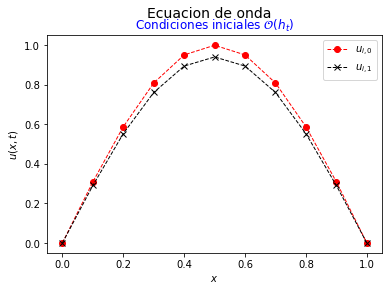

In [13]:
x = np.linspace(0,L,N+2)   # Coordenadas  de la  malla
u = f(x)                      # Condicion  inicial
w = condicionesIniciales(lamb , ht, u, x, op=2) # Euler :op = 1
plt.suptitle('Ecuacion de onda', fontsize =14)
plt.plot(x, u,'ro--', lw = 1, label = "$u_{i,0}$")
plt.plot(x, w,'kx--', lw = 1, label = "$u_{i,1}$")
plt.title('Condiciones iniciales $\mathcal{O}(h_t)$', color='blue', fontsize =12)
plt.ylabel('$u(x,t)$')
plt.xlabel('$x$')
plt.legend()
plt.savefig('condicion_O3.pdf')
plt.show()

[0.         0.29071651 0.55297566 0.7611057  0.89473341 0.94077838
 0.89473341 0.7611057  0.55297566 0.29071651 0.        ]
[0.         0.23798262 0.45266984 0.62304659 0.73243519 0.77012794
 0.73243519 0.62304659 0.45266984 0.23798262 0.        ]
[0.         0.23798262 0.45266984 0.62304659 0.73243519 0.77012794
 0.73243519 0.62304659 0.45266984 0.23798262 0.        ]
[0.         0.1570613  0.29874835 0.41119183 0.48338498 0.50826105
 0.48338498 0.41119183 0.29874835 0.1570613  0.        ]
[0.         0.1570613  0.29874835 0.41119183 0.48338498 0.50826105
 0.48338498 0.41119183 0.29874835 0.1570613  0.        ]
[0.         0.05753714 0.10944214 0.15063418 0.1770811  0.18619408
 0.1770811  0.15063418 0.10944214 0.05753714 0.        ]
[0.         0.05753714 0.10944214 0.15063418 0.1770811  0.18619408
 0.1770811  0.15063418 0.10944214 0.05753714 0.        ]
[ 0.         -0.04880191 -0.09282676 -0.12776507 -0.15019685 -0.15792631
 -0.15019685 -0.12776507 -0.09282676 -0.04880191  0.       

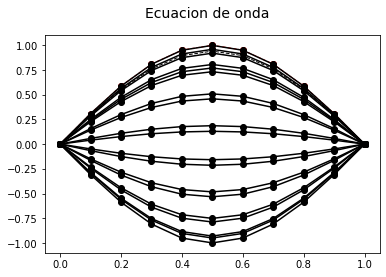

In [15]:
x = np.linspace(0,L,N+2)   # Coordenadas  de la  malla
u = f(x)                      # Condicion  inicial
w = condicionesIniciales(lamb , ht, u, x, op=2) # Euler :op = 1
plt.suptitle('Ecuacion de onda', fontsize =14)
plt.plot(x, u,'ro--', lw = 1, label = "$u_{i,0}$")
plt.plot(x, w,'kx--', lw = 1, label = "$u_{i,1}$")
w = condicionesIniciales(lamb , ht, u, x, op = 2) # Euler :op = 1
xs=np.linspace(0,L,100)
s = solver(u, w, N, x, Nt, lamb,xs)

In [7]:
print(Nt)

20


In [8]:
w = condicionesIniciales(lamb , ht, u, x, op = 2) # Euler :op = 1
s = solver(u, w, N, x, Nt, lamb)

TypeError: solver() missing 1 required positional argument: 'xs'